In [1]:
# 먼저, 명령프롬프트를 관리자 권한 실행하고, 아래와 같이 패키지를 설치해 줍니다.
# (base) C:\Windows\system32>cd C:\Python_Study\Lecture03
# (base) C:\Python_Study\Lecture03>pip install JPype1-1.2.0-cp37-cp37m-win_amd64.whl
# (base) C:\Python_Study\Lecture03>pip install konlpy
# (base) C:\Python_Study\Lecture03>pip show konlpy
# 프로젝트에 필요한 파이썬 패키지를 임포트한다.
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
# json 파일을 읽어서 json.loads() data 객체에 저장한다. 한글이 깨지지 않도록
# utf-8 형식으로 인코딩한다. encoding='utf-8'
# 임포트한 패키지는 다음과 같은 용도로 사용한다.
# json : json 파일을 다루기 위한 모듈
# Okt : 한글 품사 태깅을 위한 모듈
inputFileName = './data/student_counseling_2024-09-10'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data # 출력하여 내용 확인

[{'created_time': '2024-02-15',
  'name': '김민수',
  'residence': '서울 서초구',
  'grade': '2등급',
  'interest': '과학에 강한 관심이 있으며 과학고등학교 진학을 희망합니다. 기숙사가 있는 학교를 선호하며, 기숙사가 없다면 통학거리가 가까운 학교를 고려하고 있습니다. 조언 부탁드립니다.'},
 {'created_time': '2024-03-22',
  'name': '이지은',
  'residence': '부산 해운대구',
  'grade': '4등급',
  'interest': '예술 분야에 관심이 있으며 음악 전공을 목표로 하고 있습니다. 예술고등학교나 관련된 특목고를 추천받고 싶습니다. 통학은 괜찮으니 기숙사가 없어도 무방합니다.'},
 {'created_time': '2024-05-10',
  'name': '박성호',
  'residence': '경기도 고양시',
  'grade': '3등급',
  'interest': '외국어에 관심이 많아 외국어고등학교 진학을 원합니다. 교통이 편리한 공립 외국어고등학교를 희망합니다. 관련 학교 추천 부탁드립니다.'},
 {'created_time': '2024-06-05',
  'name': '한수정',
  'residence': '인천 남동구',
  'grade': '5등급',
  'interest': '체육에 관심이 많아 체육 특성화 고등학교 진학을 원합니다. 통학거리가 멀지 않은 학교를 추천 부탁드립니다.'},
 {'created_time': '2024-07-13',
  'name': '정민재',
  'residence': '대전 중구',
  'grade': '1등급',
  'interest': '자율형 사립고등학교를 목표로 하고 있으며, 과학과 수학에 강점이 있습니다. 기숙사가 있는 학교를 선호합니다. 추천 부탁드립니다.'},
 {'created_time': '2024-08-20',
  'name': '최수진',
  'residen

In [3]:
# Page257 : 2. data에 저장된 json 구조에서 'interest' 키의 내용이 우리가 분석할
# 상담글 본문 데이터다. 'interest'키의 데이터에서 품사가 명사인 단어만 추출한다.
# 'message'키의 값(상담 본문 내용)에서 문자나 숫자가 아닌 것 r'[^\w]'은 공백으로
# 치환하여 re.sub() 제거하면서 연결하여 전체를 하나의 문자열로 구성한다.
message = ''
for item in data:
    if 'interest' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['interest']) + ''
message # 출력하여 내용 확인

'과학에 강한 관심이 있으며 과학고등학교 진학을 희망합니다  기숙사가 있는 학교를 선호하며  기숙사가 없다면 통학거리가 가까운 학교를 고려하고 있습니다  조언 부탁드립니다 예술 분야에 관심이 있으며 음악 전공을 목표로 하고 있습니다  예술고등학교나 관련된 특목고를 추천받고 싶습니다  통학은 괜찮으니 기숙사가 없어도 무방합니다 외국어에 관심이 많아 외국어고등학교 진학을 원합니다  교통이 편리한 공립 외국어고등학교를 희망합니다  관련 학교 추천 부탁드립니다 체육에 관심이 많아 체육 특성화 고등학교 진학을 원합니다  통학거리가 멀지 않은 학교를 추천 부탁드립니다 자율형 사립고등학교를 목표로 하고 있으며  과학과 수학에 강점이 있습니다  기숙사가 있는 학교를 선호합니다  추천 부탁드립니다 정보기술 관련 특성화 고등학교 진학을 고민 중입니다  통학거리가 가까운 학교를 선호합니다  조언 부탁드립니다 외국어에 흥미가 있어 외국어고등학교 진학을 희망합니다  기숙사는 크게 상관없으며  학업 중심의 학교를 추천받고 싶습니다 예술 특목고 진학을 희망하며  특히 미술을 전공하고 싶습니다  통학이 가능한 가까운 학교를 원합니다 과학고등학교에 관심이 많으며  기숙사가 있으면 좋겠고  멀리라도 괜찮습니다  과학고 진학 가능성에 대한 상담을 원합니다 일반계 고등학교 진학을 고민 중이며  가까운 학교를 선호합니다  사립학교도 고려하고 있습니다  추천 부탁드립니다 인문학에 관심이 많아 인문계 고등학교 진학을 원합니다  학업에 중점을 둔 학교를 선호합니다 사회과학에 흥미가 있으며  사회과학 특성화 고등학교를 고려하고 있습니다  통학이 가능한 가까운 학교를 원합니다 자연과학 분야에 관심이 있어 자연과학 특성화 고등학교를 원합니다  기숙사가 있으면 좋지만  통학이 가능해도 괜찮습니다 디자인에 관심이 있어 디자인 특성화 고등학교 진학을 목표로 하고 있습니다  통학거리가 가까운 학교를 선호합니다 공학에 관심이 있으며  공학 관련 특성화 고등학교를 고려하고 있습니다  기숙사와 통학거리 모두 괜찮습니다 

In [4]:
# 품사 태깅 패키지인 Okt를 사용하여 명사만 추출해 nlp.nouns() message_N에 저장한다.
# In[*] 표시는 "처리중"이라는 표시인데, 조금만 기다려 주시기 바랍니다.
nlp = Okt()
message_N = nlp.nouns(message)
message_N # 출력하여 내용 확인

['과학',
 '관심',
 '과학',
 '고등학교',
 '진학',
 '희망',
 '기숙사',
 '학교',
 '선호',
 '기숙사',
 '통학',
 '거리',
 '학교',
 '고려',
 '조언',
 '예술',
 '분야',
 '관심',
 '음악',
 '전공',
 '목표',
 '예술',
 '고등학교',
 '관련',
 '특목고',
 '추천',
 '통학',
 '기숙사',
 '무방',
 '외국어',
 '관심',
 '외국어',
 '고등학교',
 '진학',
 '교통',
 '공립',
 '외국어',
 '고등학교',
 '희망',
 '관련',
 '학교',
 '추천',
 '체육',
 '관심',
 '체육',
 '특성',
 '고등학교',
 '진학',
 '통학',
 '거리',
 '학교',
 '추천',
 '자율',
 '사립',
 '고등학교',
 '목표',
 '과학',
 '수학',
 '강점',
 '기숙사',
 '학교',
 '선호',
 '추천',
 '정보기술',
 '관련',
 '특성',
 '고등학교',
 '진학',
 '고민',
 '중',
 '통학',
 '거리',
 '학교',
 '선호',
 '조언',
 '외국어',
 '흥미',
 '외국어',
 '고등학교',
 '진학',
 '희망',
 '기숙사',
 '크게',
 '학업',
 '중심',
 '학교',
 '추천',
 '예술',
 '특목고',
 '진학',
 '희망',
 '미술',
 '전공',
 '통학',
 '학교',
 '과학',
 '고등학교',
 '관심',
 '기숙사',
 '멀리',
 '과학고',
 '진학',
 '가능성',
 '대한',
 '상담',
 '일반',
 '고등학교',
 '진학',
 '고민',
 '중이',
 '학교',
 '선호',
 '사립학교',
 '고려',
 '추천',
 '인문학',
 '관심',
 '인문',
 '고등학교',
 '진학',
 '학업',
 '중점',
 '학교',
 '선호',
 '사회과학',
 '흥미',
 '사회과학',
 '특성',
 '고등학교',
 '고려',
 '통학',
 '학교',
 '자연과학',
 '분야',
 '관심',
 '자연과학

In [5]:
# Page258 : [5] 데이터 탐색 및 분석 모델 구축
# 1. 명사를 추출하여 저장한 message_N에 있는 단어들을 탐색해보자.
# Counter() 함수를 사용하여 단어별 출현 횟수를 계산한다.
count = Counter(message_N)
count # 출력하여 내용 확인

Counter({'과학': 10,
         '관심': 20,
         '고등학교': 30,
         '진학': 16,
         '희망': 5,
         '기숙사': 14,
         '학교': 22,
         '선호': 13,
         '통학': 19,
         '거리': 12,
         '고려': 10,
         '조언': 2,
         '예술': 5,
         '분야': 4,
         '음악': 1,
         '전공': 2,
         '목표': 7,
         '관련': 8,
         '특목고': 2,
         '추천': 6,
         '무방': 1,
         '외국어': 8,
         '교통': 1,
         '공립': 1,
         '체육': 6,
         '특성': 17,
         '자율': 1,
         '사립': 1,
         '수학': 3,
         '강점': 3,
         '정보기술': 2,
         '고민': 2,
         '중': 1,
         '흥미': 4,
         '크게': 2,
         '학업': 4,
         '중심': 3,
         '미술': 1,
         '멀리': 1,
         '과학고': 1,
         '가능성': 1,
         '대한': 1,
         '상담': 1,
         '일반': 1,
         '중이': 1,
         '사립학교': 1,
         '인문학': 1,
         '인문': 1,
         '중점': 1,
         '사회과학': 4,
         '자연과학': 2,
         '디자인': 4,
         '공학': 4,
         '모두': 3,
 

In [6]:
# 출현 횟수가 많은 상위 80개의 단어 중에서 길이가 1보다 큰 것만 word_count 딕셔너리에
# 저장하면서 출력하여 확인한다.
word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

고등학교 : 30
학교 : 22
관심 : 20
통학 : 19
특성 : 17
진학 : 16
기숙사 : 14
선호 : 13
거리 : 12
과학 : 10
고려 : 10
관련 : 8
외국어 : 8
목표 : 7
추천 : 6
체육 : 6
희망 : 5
예술 : 5
분야 : 4
흥미 : 4
학업 : 4
사회과학 : 4
디자인 : 4
공학 : 4
수학 : 3
강점 : 3
중심 : 3
모두 : 3
조언 : 2
전공 : 2
특목고 : 2
정보기술 : 2
고민 : 2
크게 : 2
자연과학 : 2
수학과 : 2
가지 : 2
사회 : 2
기업 : 2
생물학 : 2
국제 : 2
관계 : 2
문학 : 2
음악 : 1
무방 : 1
교통 : 1
공립 : 1
자율 : 1
사립 : 1
미술 : 1
멀리 : 1
과학고 : 1
가능성 : 1
대한 : 1
상담 : 1
일반 : 1
중이 : 1
사립학교 : 1
인문학 : 1
인문 : 1
중점 : 1
언어 : 1


In [7]:
# 2. 단어 빈도를 시각적으로 탐색하기 위해 히스토그램을 그려보자.
# 히스토그램에 레이블을 한글로 표시하기 위해 한글 폰트인 맑은고딕체 malgun.ttf를
# 설정한다. matplotlib.rc()
# C:/Windows/Fonts 폴더 안에서 한글로 "맑은 고딕" 선택하고, "맑은 고딕 보통" 클릭 선택
# 마우스 우클릭 - 속성에서 malgun.ttf 확인
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

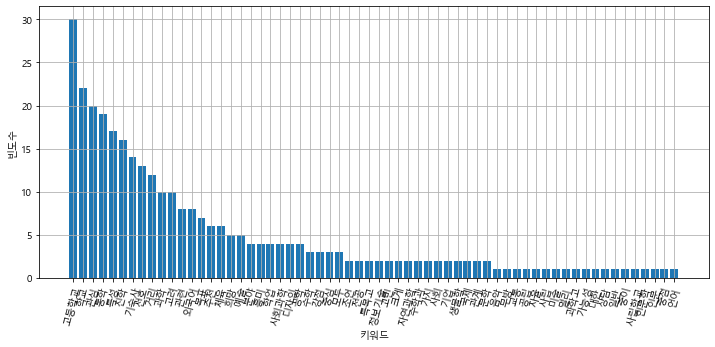

In [8]:
# 히스토그램을 생성한다.
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '75')
plt.show()

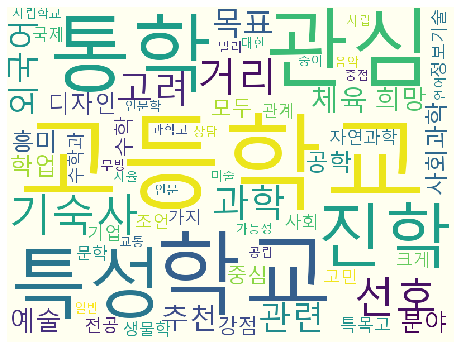

In [9]:
# Page260 : [6] 결과 시각화 : 페이스북 전자신문 페이지의 '4차 산업혁명' 기사에서
# 명사 키워드를 분석하기 위해 단어 구성을 탐색하였다.
# 단어 빈도 분석 결과를 워드클라우드로 시각화해보자.
# 워드클라우드 객체를 생성하고 WordCloud(), word_count에서
# 단어별 빈도수를 계산해서 wc.generate_from_frequencies() cloud 객체에 저장하고,
# 워드클라우드를 생성한다. plt.imshow()
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [10]:
# 워드클라우드를 jpg 파일로 저장한다. to_file()
cloud.to_file("./data/twitter_kr_cloud.jpg")

In [ ]:
# 지금까지, 텍스트에 대한 간단한 단어 분석을 수행해 보았다.